# Classifier Prediction

## Import modules

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

from pathlib import Path

import numpy as np
import nibabel as nib

from matplotlib import pyplot as plt
import imageio

Ignore : warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

In [2]:
__file__ = 'Classifier_prediction.ipynb'
BASE_DIR = Path(__file__).resolve().parent
PARENT_DIR = BASE_DIR.parent

In [3]:
lib_path = PARENT_DIR / "Classification"
import sys
sys.path.insert(0,str(lib_path))
from lib.Classifier_Preprocessing import *

## Initialiser les chemins

In [5]:
SAVE_DIR = BASE_DIR / "save"

path_model = PARENT_DIR / "Classification" / "models-classification" / 'MobileNetV2_SGD_kl_divergence_50_2.h5'
path_model = str(path_model)

SIZE_IMG = 128

In [6]:
SAVE_DIR

PosixPath('/home/allan/Licence3_Informatique/LIFPRO/Prediction/save')

## Charger le model

In [8]:
classifier = tf.keras.models.load_model(path_model)
classifier.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

## Récuperation des images

In [24]:
save_dir = os.listdir(str(SAVE_DIR))
save_dir

['x_axis', 'y_axis', 'z_axis']

In [25]:
tab_img = []
for dir in save_dir:
    path = SAVE_DIR / dir
    for f in Path(path).glob("*.jpeg") :
        tab_img.append(f)
        print(f)

/home/allan/Licence3_Informatique/LIFPRO/Prediction/save/x_axis/slice_x_0.jpeg
/home/allan/Licence3_Informatique/LIFPRO/Prediction/save/x_axis/slice_x_3.jpeg
/home/allan/Licence3_Informatique/LIFPRO/Prediction/save/x_axis/slice_x_1.jpeg
/home/allan/Licence3_Informatique/LIFPRO/Prediction/save/x_axis/slice_x_4.jpeg
/home/allan/Licence3_Informatique/LIFPRO/Prediction/save/x_axis/slice_x_2.jpeg
/home/allan/Licence3_Informatique/LIFPRO/Prediction/save/y_axis/slice_y_4.jpeg
/home/allan/Licence3_Informatique/LIFPRO/Prediction/save/y_axis/slice_y_1.jpeg
/home/allan/Licence3_Informatique/LIFPRO/Prediction/save/y_axis/slice_y_3.jpeg
/home/allan/Licence3_Informatique/LIFPRO/Prediction/save/y_axis/slice_y_0.jpeg
/home/allan/Licence3_Informatique/LIFPRO/Prediction/save/y_axis/slice_y_2.jpeg
/home/allan/Licence3_Informatique/LIFPRO/Prediction/save/z_axis/slice_z_3.jpeg
/home/allan/Licence3_Informatique/LIFPRO/Prediction/save/z_axis/slice_z_4.jpeg
/home/allan/Licence3_Informatique/LIFPRO/Prediction/

## Prediction des images

#### Charger les images + resize

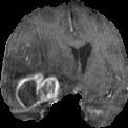

In [26]:
test_image = []
for i in range(len(tab_img)):
    test_image.append(keras.preprocessing.image.load_img(tab_img[i], target_size = (SIZE_IMG,SIZE_IMG)))
test_image[5]

#### Prédition de chaque image

In [27]:
resultTab = []
for i in range(len(test_image)) :
    image = keras.utils.img_to_array(test_image[i])
    image = np.expand_dims(image, axis=0)
    result = classifier.predict(image)
    resultTab.append(result)

1/1 [==============================] - 0s 47ms/step


In [28]:
result = []
for i in range(len(resultTab)):
    max = 0
    for j in range(4):
        if max < resultTab[i][0][j]:
            max = j
    if max == 0:
        result.append('glioma')
    elif max == 1:
        result.append('meningioma')
    elif max == 2:
        result.append('notumor')
    elif max == 3:
        result.append('pituitary')

In [29]:
result

['meningioma',
 'notumor',
 'meningioma',
 'meningioma',
 'meningioma',
 'notumor',
 'meningioma',
 'notumor',
 'notumor',
 'meningioma',
 'notumor',
 'meningioma',
 'meningioma',
 'notumor',
 'meningioma']

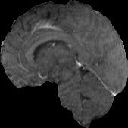

In [30]:
test_image[0]

Mauvais résultat

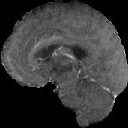

In [31]:
test_image[1]

Bon résultat

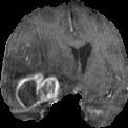

In [32]:
test_image[5]

Skull stripping du dataset du classifier pour l'améliorer ?

### 2e prédiction

In [33]:
path = PARENT_BASE_DIR / "Classification" / "dataset" / "test"
tab_img = []

for f in Path(path).glob("Tr-no*") :
    tab_img.append(f)
    print(f)

/home/allan/Licence3_Informatique/LIFPRO/Classification/dataset/test/Tr-no_0243.jpg
/home/allan/Licence3_Informatique/LIFPRO/Classification/dataset/test/Tr-no_0219.jpg
/home/allan/Licence3_Informatique/LIFPRO/Classification/dataset/test/Tr-no_0259.jpg
/home/allan/Licence3_Informatique/LIFPRO/Classification/dataset/test/Tr-no_0275.jpg
/home/allan/Licence3_Informatique/LIFPRO/Classification/dataset/test/Tr-no_0297.jpg
/home/allan/Licence3_Informatique/LIFPRO/Classification/dataset/test/Tr-no_0305.jpg
/home/allan/Licence3_Informatique/LIFPRO/Classification/dataset/test/Tr-no_0252.jpg
/home/allan/Licence3_Informatique/LIFPRO/Classification/dataset/test/Tr-no_0293.jpg
/home/allan/Licence3_Informatique/LIFPRO/Classification/dataset/test/Tr-no_0301.jpg
/home/allan/Licence3_Informatique/LIFPRO/Classification/dataset/test/Tr-no_0262.jpg
/home/allan/Licence3_Informatique/LIFPRO/Classification/dataset/test/Tr-no_0321.jpg
/home/allan/Licence3_Informatique/LIFPRO/Classification/dataset/test/Tr-no_0

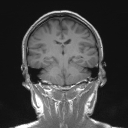

In [34]:
test_image = []
for i in range(len(tab_img)):
    test_image.append(keras.preprocessing.image.load_img(tab_img[i], target_size = (SIZE_IMG,SIZE_IMG)))
test_image[0]

In [35]:
resultTab = []
for i in range(len(test_image)) :
    image = keras.utils.img_to_array(test_image[i])
    image = np.expand_dims(image, axis=0)
    result = classifier.predict(image)
    resultTab.append(result)

1/1 [==============================] - 0s 52ms/step


In [36]:
result = []
for i in range(len(resultTab)):
    max = 0
    for j in range(4):
        if max < resultTab[i][0][j]:
            max = j
    if max == 0:
        result.append('glioma')
    elif max == 1:
        result.append('meningioma')
    elif max == 2:
        result.append('notumor')
    elif max == 3:
        result.append('pituitary')
result

['notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor']